## Word embedding

In [19]:
import pandas as pd

In [20]:
df = pd.read_json('posts.json')

In [21]:
df

,descripcion,fecha
0,Here we have the lead trends for 2022!!!▪️Arti...,17/12/2021
1,It’s almost 2022 and we want to share the AI l...,15/12/2021
2,"""...Here we [...] demonstrate a method by whic...",10/12/2021
3,The limit of RPA is the imagination of the pro...,9/12/2021
4,Introducing an indoor garden controlled with a...,2/12/2021
...,...,...
266,Have you seen the future of the creative proce...,27/3/2023
267,It's fascinating how our understanding of brai...,29/3/2023
268,This is a summary of our last article: Artific...,30/3/2023
269,Nature has inspired a lot of innovations from ...,31/3/2023


In [22]:
corpus=df["descripcion"].values.tolist()
print(corpus)

['Here we have the lead trends for 2022!!!▪️Artificial Intelligence ▪️Data and Analytics ▪️RPAWhich one will you implement in your business?', 'It’s almost 2022 and we want to share the AI lead trends for the future year!  #ai #share #future #aitrends #artificialintelligence #digitaltrasnformation', '"...Here we [...] demonstrate a method by which #machinelearning can aid mathematicians in discovering new #conjectures and #theorems ..."That\'s simply amazing how things are evolving in this field!', 'The limit of RPA is the imagination of the programmer! 🤖▪️Can you tell us a RPA out of the box application? Juan Carlos Castaño Valencia Diana Cristhina Pérez Pérez Fabian Esteban Peña Castillo #artificialintelligence #datascience #computerscience #rpa #aix #ai #computervision #machinelearning #nlp#uxdesign #uidesign #rpa #robotprocessautomation#robotprogramming #creativedevelopment #inspiring #sentences', 'Introducing an indoor garden controlled with an app and AI to enjoy fresh vegetables

## Tokenizacion sin lemattizer 

In [23]:
import nltk
nltk.download('punkt')


corpus_tok = [nltk.word_tokenize(sent) for sent in corpus]
corpus_tok

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['Here',
  'we',
  'have',
  'the',
  'lead',
  'trends',
  'for',
  '2022',
  '!',
  '!',
  '!',
  '▪️Artificial',
  'Intelligence',
  '▪️Data',
  'and',
  'Analytics',
  '▪️RPAWhich',
  'one',
  'will',
  'you',
  'implement',
  'in',
  'your',
  'business',
  '?'],
 ['It',
  '’',
  's',
  'almost',
  '2022',
  'and',
  'we',
  'want',
  'to',
  'share',
  'the',
  'AI',
  'lead',
  'trends',
  'for',
  'the',
  'future',
  'year',
  '!',
  '#',
  'ai',
  '#',
  'share',
  '#',
  'future',
  '#',
  'aitrends',
  '#',
  'artificialintelligence',
  '#',
  'digitaltrasnformation'],
 ['``',
  '...',
  'Here',
  'we',
  '[',
  '...',
  ']',
  'demonstrate',
  'a',
  'method',
  'by',
  'which',
  '#',
  'machinelearning',
  'can',
  'aid',
  'mathematicians',
  'in',
  'discovering',
  'new',
  '#',
  'conjectures',
  'and',
  '#',
  'theorems',
  '...',
  "''",
  'That',
  "'s",
  'simply',
  'amazing',
  'how',
  'things',
  'are',
  'evolving',
  'in',
  'this',
  'field',
  '!'],
 ['

In [24]:
words = ['algorithm', 'bias', 'big data', 'coding', 'computer', 'cybersecurity', 'data', 'digital divide', 'discrimination', 'ethics', 'gender', 'internet', 'machine learning', 'privacy', 'programming', 'robot', 'software', 'technology']
bias_words = ['ageism', 'ableism', 'racism', 'sexism', 'heterosexism', 'homophobia', 'transphobia', 'colorism', 'lookism', 'sizeism', 'classism', 'xenophobia']
words2 = ['Manpower', 'Chairman', 'Businessman', 'Freshman', 'Journeyman', 'Salesman', 'Mankind', 'Right-hand man', 'Workmanlike', 'Policeman', 'Fireman', 'Postman', 'Forefathers', 'Craftsman', 'Repairman', 'Mansplain', 'He', "She","him","her", 'Artificial Intelligence']
total_words=list(set(words+bias_words+words2))
total_words

['him',
 'He',
 'big data',
 'Journeyman',
 'data',
 'Mansplain',
 'Forefathers',
 'ageism',
 'algorithm',
 'Manpower',
 'computer',
 'privacy',
 'robot',
 'ethics',
 'xenophobia',
 'machine learning',
 'Right-hand man',
 'racism',
 'Policeman',
 'gender',
 'bias',
 'Chairman',
 'classism',
 'She',
 'Fireman',
 'Salesman',
 'sexism',
 'cybersecurity',
 'discrimination',
 'Postman',
 'Artificial Intelligence',
 'her',
 'internet',
 'ableism',
 'heterosexism',
 'digital divide',
 'sizeism',
 'colorism',
 'Freshman',
 'transphobia',
 'lookism',
 'software',
 'technology',
 'homophobia',
 'Workmanlike',
 'Mankind',
 'coding',
 'Businessman',
 'Craftsman',
 'Repairman',
 'programming']

In [25]:
from gensim.models import Word2Vec

# Define los parámetros de tu modelo personalizado
vector_size = 100
window_size = 5

# Construye el vocabulario de tu modelo utilizando las palabras del corpus tokenizado
model = Word2Vec(corpus_tok, vector_size=vector_size, window=window_size, min_count=1)

# Entrena el modelo Word2Vec con el corpus tokenizado
model.train(corpus_tok, total_examples=len(corpus_tok), epochs=500)

# Guarda el modelo entrenado para su uso posterior
model.save("mi_modelo_word2vec.model")

In [26]:
vector = model.wv['nlp']
vector

array([-0.11616287,  0.30952847,  1.7070317 , -0.28414032,  1.3419703 ,
        2.416859  , -0.57009375,  3.7529724 , -0.7090222 , -1.8010943 ,
       -0.51194423, -3.8307047 , -4.2091236 ,  1.860844  ,  1.5617282 ,
       -1.4091606 , -1.4207238 , -2.4126236 , -0.11284515, -1.5486982 ,
       -0.7449494 ,  1.5285646 , -1.1932884 , -3.335638  , -3.6928296 ,
       -0.9633766 , -0.4762229 , -1.8027096 , -1.8159025 ,  0.96286356,
        2.4142447 ,  0.74598426, -1.4101843 , -0.9442724 , -1.5954888 ,
       -0.09169587,  1.3239089 ,  0.34032822,  2.5415235 , -1.2370727 ,
        0.8195948 ,  1.1375103 ,  1.208681  ,  0.24556512,  1.8817003 ,
        2.6420343 , -0.7414441 , -1.1076617 ,  3.2073338 , -0.47479597,
       -1.3497696 ,  0.36940116,  2.1355138 , -0.00497222, -0.32399917,
        0.43859646, -0.887485  ,  2.5237257 ,  1.6154283 , -1.2503725 ,
        0.18617107,  2.5885382 , -0.87662065, -1.0347799 , -1.3191227 ,
       -1.7060908 ,  1.9513475 ,  1.3975395 ,  0.63482267, -0.59

In [36]:
similares = model.wv.most_similar('gaming')
similares

[('pc', 0.7728883624076843),
 ('console', 0.7006695866584778),
 ('practicing', 0.6799310445785522),
 ('karate.Fun', 0.6534886956214905),
 ('animated', 0.6454796195030212),
 ('metal', 0.6444351077079773),
 ('PC', 0.6141484975814819),
 ('cycling', 0.6118229627609253),
 ('Videogame', 0.5960285067558289),
 ('metres', 0.5956435799598694)]

In [28]:
similares = model.wv.most_similar('equinoxailab')
similares

[('#', 0.6445282697677612),
 ('dataethics', 0.5741337537765503),
 ('chatbot', 0.5475043058395386),
 ('maythe4th', 0.5440005660057068),
 ('facedetection', 0.5439873337745667),
 ('nytimes', 0.5287609100341797),
 ('gpt3', 0.5254097580909729),
 ('bingai', 0.5252669453620911),
 ('OpenAI', 0.5245615839958191),
 ('freedomofspeech', 0.5182155966758728)]

In [29]:
similitud = model.wv.similarity('chatbot', 'nlp')
similitud

0.27929306

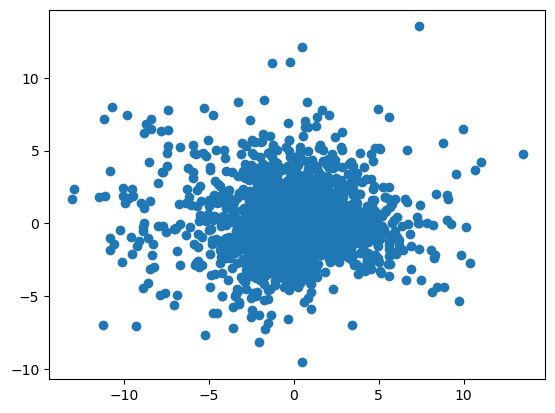

In [30]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# cargar modelo entrenado
model = Word2Vec.load("mi_modelo_word2vec.model")

# obtener vectores de palabras entrenados por Word2Vec
word_vectors = model.wv.vectors

# aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(word_vectors)

# graficar los componentes principales
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.show()


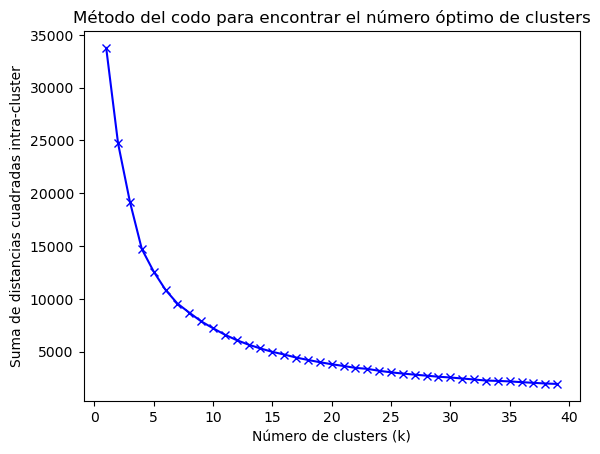

In [31]:
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# crear una lista vacía para almacenar las sumas de las distancias cuadradas intra-cluster
sum_of_squared_distances = []

# realizar k-means clustering para diferentes valores de k
K = range(1, 40)
for k in K:
    k_means = KMeans(n_clusters=k)
    k_means.fit(principal_components)
    sum_of_squared_distances.append(k_means.inertia_)

# graficar la suma de las distancias cuadradas intra-cluster para diferentes valores de k
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de distancias cuadradas intra-cluster')
plt.title('Método del codo para encontrar el número óptimo de clusters')
plt.show()


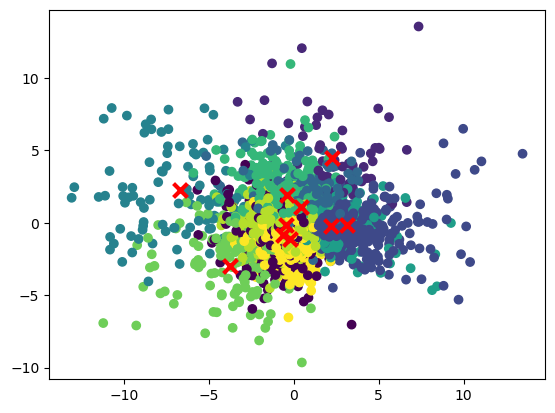

In [32]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# cargar modelo entrenado
model = Word2Vec.load("mi_modelo_word2vec.model")

# obtener vectores de palabras entrenados por Word2Vec
word_vectors = model.wv.vectors

# aplicar PCA
pca = PCA(n_components=100)
principal_components = pca.fit_transform(word_vectors)

# aplicar k-means
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(principal_components)

# graficar los resultados de k-means
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=100, linewidths=3, color='r')
plt.show()


In [33]:
# obtener las etiquetas de los clusters para cada punto en el espacio 2D producido por PCA
labels = kmeans.predict(principal_components)

# crear un diccionario para almacenar las palabras por cluster
clusters = {}

# agregar cada palabra al cluster correspondiente
for i, word in enumerate(model.wv.index_to_key):
    cluster = labels[i]
    if cluster not in clusters:
        clusters[cluster] = []
    clusters[cluster].append(word)

# imprimir palabras por cluster
for cluster, words in clusters.items():
    print(f"Cluster {cluster}: {words}")



Cluster 2: ['#', 'artificialintelligence', 'equinoxailab', 'ai', 'datascience', 'machinelearning', 'computervision', 'computerscience', 'uxdesign', 'design', 'think', 'uidesign', 'rpa', 'Lab', 'nlp', 'robots', 'tech', 'future', 'deeplearning', 'innovation', 'dataanalytics', 'Holistic', 'aix', 'digitaltransformation', 'quantumcomputing', 'robotics', 'datascientist', 'userexperience', 'movies', 'aiart', 'IBM', 'designer', 'engineering', 'python', 'internship', '|', 'equinox', 'coding', 'roboticprocessautomation', 'ux', 'humancomputerinteraction', 'reels', 'Retail', 'virtualreality', 'Oscar', '⬇️', 'metaverse', 'sentences', 'designers', 'thankyou', 'quantummechanics', 'podcast', 'insights', 'humanrobotinteraction', 'aiethics', 'programming', 'quantumcomputer', 'ml', 'ibm', 'informative', 'inspiring', 'londonfortech', 'ecommerce', 'programmer', 'dataengineer', 'bigdata', 'virtualassistant', 'culture', 'ethics', 'modeltraining', 'chatbot', 'quantumphysics', 'quotes', 'womeninscience', 'wome

In [1]:
import pandas as pd
import spacy
import string
from langdetect import detect
import re 
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')


df = pd.read_json('posts.json')

df['language'] = df['descripcion'].apply(detect)
df=df[df['language']!= 'es'].drop('language', axis=1)

corpus=df["descripcion"]

nlp = spacy.load("en_core_web_lg")

contractions_dict = { "ain’t": "are not", "’s":" is", "aren’t": "are not", "can’t": "cannot", 
                     "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", 
                     "couldn’t": "could not", "couldn’t've": "could not have", "didn’t": "did not", 
                     "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", 
                     "hadn’t’ve": "had not have", "hasn’t": "has not", "haven’t": "have not",
                     "he’d": "he would", "he’d’ve": "he would have", "he’ll": "he will", 
                     "he’ll’ve": "he will have", "how’d": "how did", "how’d’y": "how do you", 
                     "how’ll": "how will", "i’d": "i would", "i’d’ve": "i would have", "i’ll": "i will",
                     "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not",
                     "it’d": "it would", "it’d’ve": "it would have", "it’ll": "it will", 
                     "it’ll’ve": "it will have", "let’s": "let us", "ma’am": "madam", "mayn’t": "may not",
                     "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have",
                     "must’ve": "must have", "mustn’t": "must not", "mustn’t’ve": "must not have",
                     "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock",
                     "oughtn’t": "ought not", "oughtn’t’ve": "ought not have", "shan’t": "shall not",
                     "sha’n’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would",
                     "she’d’ve": "she would have", "she’ll": "she will", "she’ll’ve": "she will have", 
                     "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
                     "so’ve": "so have", "that’d": "that would", "that’d’ve": "that would have",
                     "there’d": "there would", "there’d’ve": "there would have", "they’d": "they would",
                     "they’d’ve": "they would have","they’ll": "they will", "they’ll’ve": "they will have",
                     "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not",
                     "we’d": "we would", "we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have",
                     "we’re": "we are", "we’ve": "we have", "weren’t": "were not","what’ll": "what will",
                     "what’ll've": "what will have", "what’re": "what are", "what’ve": "what have",
                     "when’ve": "when have", "where’d": "where did", "where’ve": "where have", 
                     "who’ll": "who will", "who’ll’ve": "who will have", "who’ve": "who have",
                     "why’ve": "why have", "will’ve": "will have", "won’t": "will not",
                     "won’t’ve": "will not have", "would’ve": "would have", "wouldn’t": "would not",
                     "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would",
                     "y’all’d'’ve": "you all would have", "y’all’re": "you all are",
                     "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have",
                     "you’ll": "you will", "you’ll’ve": "you will have", "you’re": "you are",
                     "you’ve": "you have"}

contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))

def expand_contractions(s, contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)

corpus = corpus.apply(expand_contractions)

def clean_hashtag_url(post):
    """
    remove all hastags and website links from a string
    """    

    return " ".join(word for word in post.split(' ') if ("#" not in word and "http" not in word))

def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """

    return token.is_punct or token.is_space

def rm_pattern(post):
    """
    function returning a string without "...see more" and website links from the post. 
    This function uses "re.sub" to remove a specific pattern"""

    post = re.sub("…see more",'', post) # replace pattern by an empty string
    post = re.sub('http','',post)
    return post

def preprocess(post):
    
    clean_text = post.translate(str.maketrans("", "", string.punctuation))
    clean_text = clean_text.replace("\n", " ")
    clean_text = clean_text.replace("\u200d", "")
    clean_text = clean_text.replace("▪", "")
    clean_text = clean_text.replace("’", "")
    clean_text = clean_text.replace("”", "")
    clean_text = clean_text.lower()
    stop_words = set(stopwords.words('english'))
    clean_text = " ".join([word for word in clean_text.split() if word not in stop_words])
    clean_text = " ".join(clean_text.split())
    
    return clean_text

corpus = corpus.apply(clean_hashtag_url)
corpus = corpus.apply(preprocess)



def rules(token):
    """
    conditions to select a specific token for the corpus cleaning
    used with all() function : return True if all True.
    Conditions are : no pure puncuation - no pure whitespace - not a stopword 
    - not a #word
    """

    return [not punct_space(token)] 

def corpus_cleaning(posts):
    """
    generator function using spaCy to parse posts,
    remove "...see more" pattern, website links, lemmatize the text, lowercase words, and apply all the conditions we have set in rules.
    What this function returns is a generator (a "list") of individual tokens contained in lists. 
    """
    
    for post in nlp.pipe(posts.apply(rm_pattern)):
        yield ' '.join([token.lemma_ for token in post if all(rules(token))])
        
preprocessed_posts = corpus_cleaning(corpus)
streamed_posts = (post.split(' ') for post in preprocessed_posts)
all_posts = []

for streamed_post in streamed_posts:
    post = ' '.join(streamed_post)
    all_posts.append(post)
    
print(all_posts)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wdmoreno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['lead trend 2022️artificial intelligence ️data analytics ️rpawhich one implement business', 'almost 2022 want share ai lead trend future year', 'demonstrate method aid mathematician discover new that s simply amazing thing evolve field', 'limit rpa imagination programmer 🤖 ️can tell we rpa box application juan carlos castaño valencia diana cristhina pérez pérez fabian esteban peña castillo', 'introduce indoor garden control app ai enjoy fresh vegetable every day let grow 64 plant simultaneously green ai mashable', 'five way al contribute wildlifeconservation 1 vast datum collection 📊 2 study protect specie 🐨 3 track wildlife pattern 📈 4 prediction endanger specie 🐼 5 classify animal specie', 'participant plan semilla apprenticeship talk experience last month today want thank congratulate effort welcome team 👏 🏻 👏 🏻 👏 🏻thomas clarke juan francisco rodríguez hernández favio juan sebastián casas castillo leidy romero', 'today welcome new member team complete successfully plan semilla 💫 p

In [2]:
all_posts

['lead trend 2022️artificial intelligence ️data analytics ️rpawhich one implement business',
 'almost 2022 want share ai lead trend future year',
 'demonstrate method aid mathematician discover new that s simply amazing thing evolve field',
 'limit rpa imagination programmer 🤖 ️can tell we rpa box application juan carlos castaño valencia diana cristhina pérez pérez fabian esteban peña castillo',
 'introduce indoor garden control app ai enjoy fresh vegetable every day let grow 64 plant simultaneously green ai mashable',
 'five way al contribute wildlifeconservation 1 vast datum collection 📊 2 study protect specie 🐨 3 track wildlife pattern 📈 4 prediction endanger specie 🐼 5 classify animal specie',
 'participant plan semilla apprenticeship talk experience last month today want thank congratulate effort welcome team 👏 🏻 👏 🏻 👏 🏻thomas clarke juan francisco rodríguez hernández favio juan sebastián casas castillo leidy romero',
 'today welcome new member team complete successfully plan semi